# Построение столбчатых диаграмм в Matplotlib

Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Импорт данных

In [20]:
dat=pd.read_excel('C:\YellowBelt/Дефекты пиломатериалов.xlsx','Данные')
dat.head()

,№п/п,дефекты,квартал
0,1,сучки,первый
1,2,скручивание,первый
2,3,скручивание,первый
3,4,скручивание,первый
4,5,чаша,первый


Подготовка данных

In [21]:
defects=dat['дефекты'].value_counts()

# Задача №1. Оценить уровень дефектов в компании. Выделить приоритетные направления для работы команды Шесть Сигм.

Построение столбчатой диаграммы

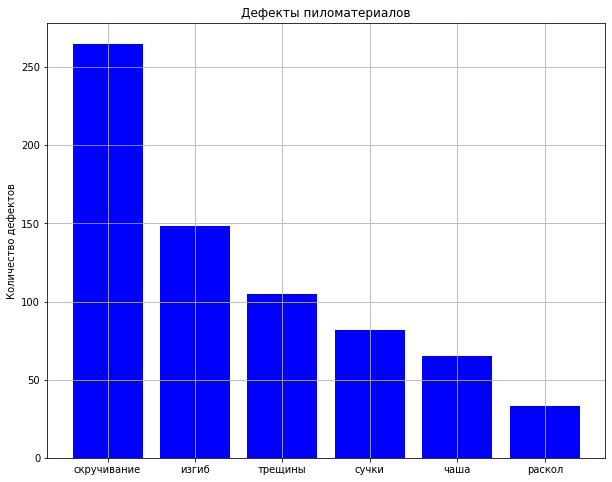

In [22]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
ax.bar(defects.index,defects,color='blue') # Построение столбчатой диаграммы
ax.set_ylabel('Количество дефектов') # Название оси Y
ax.grid(True) # Добавление линий сетки
plt.title('Дефекты пиломатериалов') # Название графика
plt.show()

Функция по добавлению названий на столбики

In [23]:
def autolabels(rects):
    """Добавление текста на каждый столбик. Текст - величина столбика"""
    for rect in rects:
        height=rect.get_height() # Значения - высота столбцов
        ax.annotate('{}'.format(height), # Добавление значений на столбцы
                    xy=(rect.get_x()+rect.get_width()/2,height), # координаты подписей
                    xytext=(0,4), # Вертикальное смещение подписи -  4 
                    textcoords="offset points", # координатная система xytext
                    ha='center',va='bottom') # горизонтальное и вертикальное расположение текста

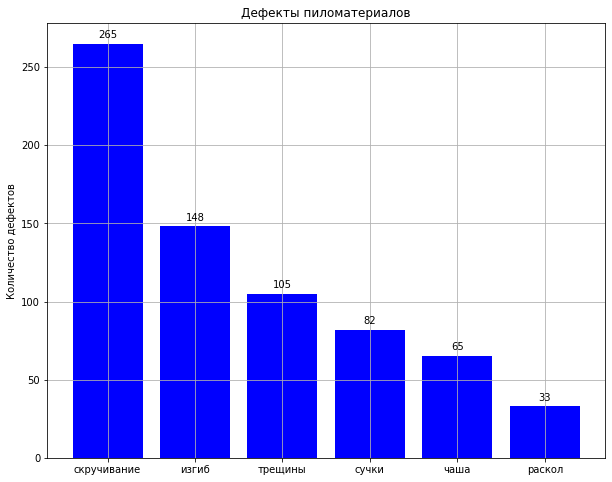

In [24]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
ax.bar(defects.index,defects,color='blue') # Построение столбчатой диаграммы
ax.set_ylabel('Количество дефектов') # Название оси Y
ax.grid(True) # Добавление линий сетки
plt.title('Дефекты пиломатериалов') # Название графика
autolabels(rects) # Добавление подписей на столбцы
plt.show() # Показать график

# Задача №2. Сравнить первый и второй кварталы и сделать соответствующие выводы

Дефекты по кварталам

In [25]:
dat_Q1=dat[dat['квартал']=='первый']['дефекты'].value_counts()
dat_Q2=dat[dat['квартал']=='второй']['дефекты'].value_counts()

In [26]:
dat_Q1

скручивание    133
трещины         52
изгиб           49
сучки           31
чаша            21
раскол          14
Name: дефекты, dtype: int64

In [27]:
dat_Q2

скручивание    132
изгиб           99
трещины         53
сучки           51
чаша            44
раскол          19
Name: дефекты, dtype: int64

In [30]:
dat_Q1_Q2=pd.concat([dat_Q1,dat_Q2],axis=1) # объединение двух объектов Series в DataFrame
dat_Q1_Q2.columns=['первый','второй'] # Имена колонок

In [31]:
dat_Q1_Q2

,первый,второй
скручивание,133,132
трещины,52,53
изгиб,49,99
сучки,31,51
чаша,21,44
раскол,14,19


In [32]:
width=0.35 # Ширина столбцов

In [33]:
x=np.arange(len(dat_Q1)) # метки для столбцов

Построение группированного графика

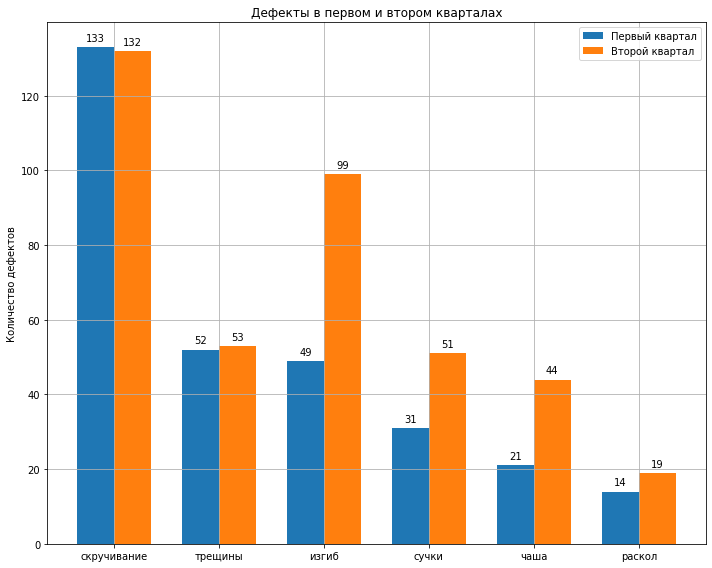

In [36]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111)
rects1=ax.bar(x-width/2,dat_Q1_Q2['первый'],width,label='Первый квартал') # Первая столбчатая диаграмма
rects2=ax.bar(x+width/2,dat_Q1_Q2['второй'],width,label='Второй квартал') # Вторая столбчатая диаграмма
ax.set_ylabel('Количество дефектов') # Подпись оси Y
ax.set_title('Дефекты в первом и втором кварталах') # Название графика
ax.set_xticks(x) # Добавление меток на ось X
ax.set_xticklabels(dat_Q1_Q2.index) # Доавление пописей меток

autolabels(rects1) # Добавление подписей на первый график
autolabels(rects2) # Добавление подписей на второй график
plt.grid(True) # Добавление линий сеток
ax.legend() # Добавление легенды на график
fig.tight_layout() 